In [486]:
import pandas as pd
import matplotlib.pyplot as plt

In [487]:
# Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price'

In [488]:
# Laptop data location:
data = pd.read_csv(r'C:\Users\JDW\OneDrive\Documents\projects\Python\Airbnb+Data\Airbnb Data\listings.csv', encoding = 'iso-8859-1', parse_dates = True, usecols = ('host_since', 'neighbourhood', 'city', 'accommodates', 'price'))
# PC data location: data = pd.read_csv(r'C:\Users\John\OneDriveFamily\OneDrive\Documents\projects\Python\Airbnb+Data\Airbnb Data\listings.csv', encoding = ' iso-8859-1', parse_dates = True, usecols = ('host_since', 'neighbourhood', 'city', 'accommodates', 'price'))

In [489]:
#Check to see if updated encoding returned expected data/dtype
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   host_since     279547 non-null  object
 1   neighbourhood  279712 non-null  object
 2   city           279712 non-null  object
 3   accommodates   279712 non-null  int64 
 4   price          279712 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 10.7+ MB


,accommodates,price
count,279712.000000,279712.000000
mean,3.288736,608.792737
std,2.133379,3441.826611
min,0.000000,0.000000
25%,2.000000,75.000000
50%,2.000000,150.000000
75%,4.000000,474.000000
max,16.000000,625216.000000


In [490]:
# Convert 'host_since' to necessary format with 'to_datetime' method and verify
data['host_since'] = pd.to_datetime(data['host_since'], format = '%Y-%m-%d')
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   host_since     279547 non-null  datetime64[ns]
 1   neighbourhood  279712 non-null  object        
 2   city           279712 non-null  object        
 3   accommodates   279712 non-null  int64         
 4   price          279712 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 10.7+ MB


,host_since,accommodates,price
count,279547,279712.000000,279712.000000
mean,2016-04-11 13:01:44.994151680,3.288736,608.792737
min,2008-08-12 00:00:00,0.000000,0.000000
25%,2014-07-01 00:00:00,2.000000,75.000000
50%,2016-02-14 00:00:00,2.000000,150.000000
75%,2018-04-09 00:00:00,4.000000,474.000000
max,2021-02-26 00:00:00,16.000000,625216.000000
std,NaN,2.133379,3441.826611


In [491]:
data['host_since'].dropna(inplace=True)


In [492]:
# Convert from datetime to date
data['host_since'] = data['host_since'].astype("datetime64[ns]")


In [493]:
# Drop missing values
data.dropna(subset = ['host_since', 'price', 'accommodates'], inplace = True)

In [494]:
# Subset data to include only rentals in Paris;  verify subset with value_counts method.
paris_data = data[data['city'] == 'Paris']
paris_data.city.value_counts()

city
Paris    64657
Name: count, dtype: int64

In [495]:
# Check for missing values
paris_data['host_since'].isna().value_counts()

host_since
False    64657
Name: count, dtype: int64

In [496]:
paris_data.sort_values('price').tail(20)

,host_since,neighbourhood,city,accommodates,price
269713,2014-04-22,Enclos-St-Laurent,Paris,6,8000
232337,2011-10-11,Elysee,Paris,2,8000
92492,2016-10-15,Louvre,Paris,12,8000
152315,2019-06-19,Temple,Paris,2,8245
215953,2018-01-28,Observatoire,Paris,1,8267
158609,2020-03-19,Observatoire,Paris,4,8400
116142,2015-02-23,Vaugirard,Paris,2,9000
251523,2016-05-08,Louvre,Paris,2,9000
149831,2020-02-19,Batignolles-Monceau,Paris,1,9000
67375,2015-02-23,Vaugirard,Paris,4,9000


In [497]:
paris_data_sorted = paris_data.sort_values('neighbourhood')
paris_data_sorted

,host_since,neighbourhood,city,accommodates,price
112245,2015-10-06,Batignolles-Monceau,Paris,2,65
141560,2018-07-03,Batignolles-Monceau,Paris,2,156
141450,2020-09-09,Batignolles-Monceau,Paris,2,80
140742,2018-05-28,Batignolles-Monceau,Paris,1,70
269132,2014-11-23,Batignolles-Monceau,Paris,2,45
...,...,...,...,...,...
119453,2009-05-18,Vaugirard,Paris,1,69
119455,2015-01-02,Vaugirard,Paris,1,51
272264,2015-02-15,Vaugirard,Paris,6,330
118245,2017-02-20,Vaugirard,Paris,1,40


In [498]:
# Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high
paris_listings_neighbourhood = paris_data_sorted.groupby('neighbourhood')['price'].mean()
paris_listings_neighbourhood = paris_listings_neighbourhood.sort_values()

In [499]:

# Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)
paris_listings_accomodations = paris_data[paris_data['neighbourhood'] == 'Elysee'].groupby('accommodates').mean('price')
paris_listings_accomodations = paris_listings_accomodations.sort_values(by = 'price')

In [500]:
# Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price 
# and count of rows representing the number of new hosts
paris_listings_over_time = paris_data.copy()
paris_listings_over_time['host_since_year'] = paris_listings_over_time['host_since'].dt.year

plot_avg_price = paris_listings_over_time.groupby(['host_since_year'])['price'].mean()
plot_count = paris_listings_over_time.groupby(['host_since_year'])['price'].count()

print(paris_listings_neighbourhood.tail(15), plot_count.head(15))

neighbourhood
Gobelins                98.110184
Observatoire           101.873591
Batignolles-Monceau    102.615616
Enclos-St-Laurent      102.988752
Vaugirard              106.842073
Opera                  119.050713
Pantheon               122.696120
Temple                 138.429300
Hotel-de-Ville         144.515228
Bourse                 149.496801
Luxembourg             155.638639
Palais-Bourbon         156.891525
Passy                  161.190476
Louvre                 175.379972
Elysee                 210.536765
Name: price, dtype: float64 host_since_year
2008        4
2009      106
2010      416
2011     1339
2012     4592
2013     8142
2014    10922
2015    12147
2016     8871
2017     4585
2018     4294
2019     5694
2020     3412
2021      133
Name: price, dtype: int64


<Axes: title={'center': 'Average Paris Rental Cost by Neighbourhood'}, xlabel='Price (euros)', ylabel='Neighbourhood'>

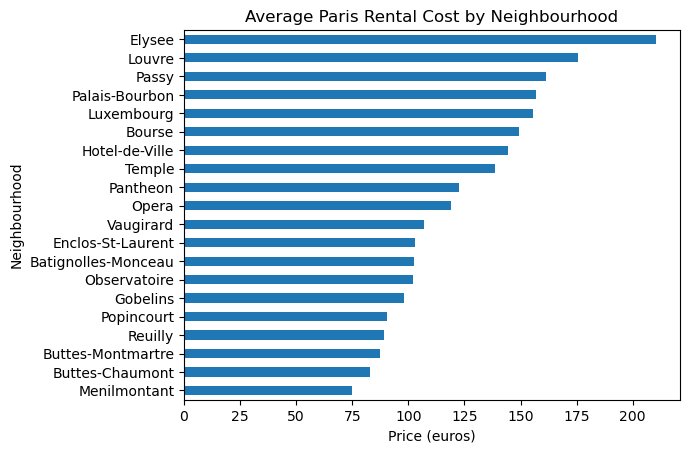

In [501]:
## Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

paris_listings_neighbourhood.plot.barh(title = 'Average Paris Rental Cost by Neighbourhood', xlabel = 'Price (euros)', ylabel = 'Neighbourhood')

<Axes: title={'center': 'Average Rental Price in Elysee by Accommodations'}, xlabel='Price (euros)', ylabel='Number of People'>

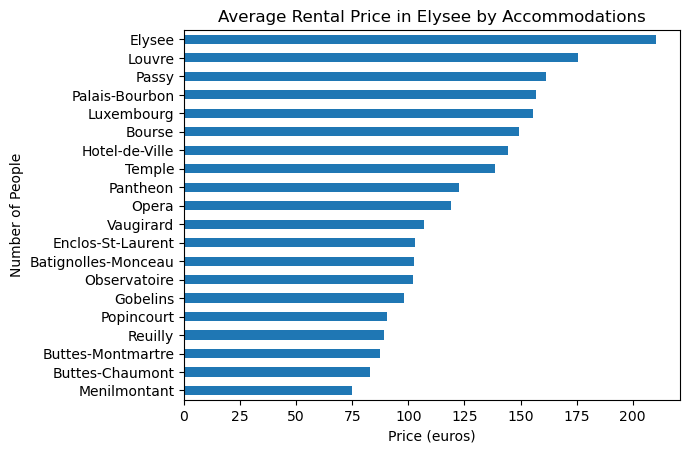

In [502]:
 ''' 
Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title
and change axis labels as needed
 '''
paris_listings_neighbourhood.plot.barh(title = 'Average Rental Price in Elysee by Accommodations', xlabel = 'Price (euros)', ylabel = 'Number of People', legend = None)


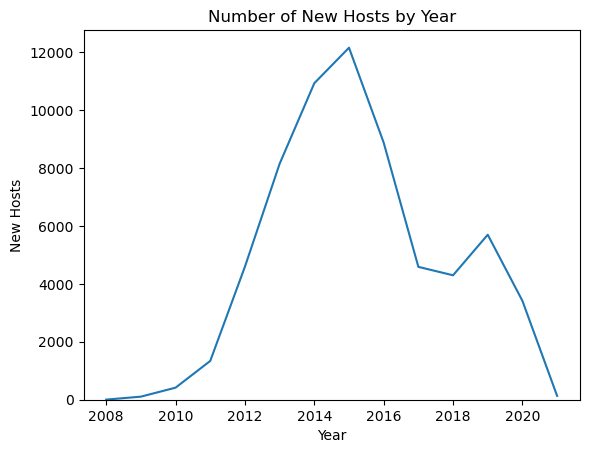

In [503]:
# Create two line charts: one showing the count of new hosts over time, and one showing average price.
# Set the y-axis limit to 0, add a title, and change axis labels as needed

ax1 = plot_count.plot.line(title = 'Number of New Hosts by Year', ylabel = 'New Hosts', xlabel = 'Year', ylim = 0)

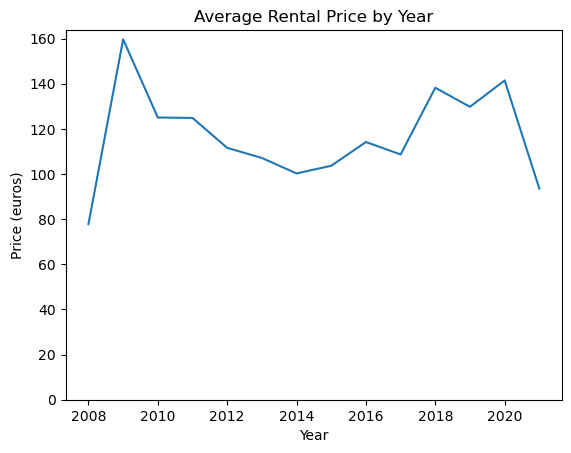

In [504]:

ax2 = plot_avg_price.plot.line(title = 'Average Rental Price by Year', ylabel = 'Price (euros)', xlabel = 'Year', ylim = 0)

In [505]:
# Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?
''' 
The 2015 regulations cannot be determined as a specific factor because it's looking at an indicator where many more may be equally at fault.  That said,
both the number of new hosts post-2015 and the average rental price in Elysee changed, with the former substantially declining and the latter slightly
increasing in Elysee specifically (the datasets in the exercise didn't look at the broader set of neighborhoods).
 '''

" \nThe 2015 regulations cannot be determined as a specific factor because it's looking at an indicator where many more may be equally at fault.  That said,\nboth the number of new hosts post-2015 and the average rental price in Elysee changed, with the former substantially declining and the latter slightly\nincreasing in Elysee specifically (the datasets in the exercise didn't look at the broader set of neighborhoods).\n "

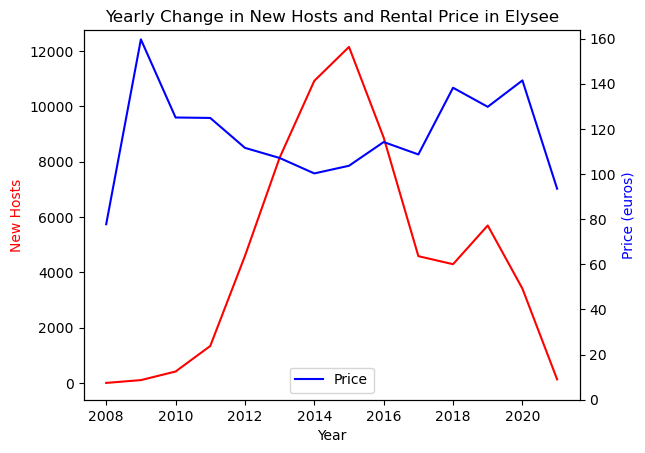

In [506]:
# BONUS: Create a dual axis line chart to show both new hosts and average price over time

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(plot_count,label = 'New Hosts', color = 'r')
ax2.plot(plot_avg_price, label = 'Price', color = 'b')

ax1.set_title('Yearly Change in New Hosts and Rental Price in Elysee')
ax1.set_xlabel('Year')
ax1.set_ylabel('New Hosts', color = 'r')
ax2.set_ylabel('Price (euros)', color = 'b')
ax2.set_ylim(0)
plt.legend(loc = 'lower center')

plt.show()